<a href="https://colab.research.google.com/github/Atla33/Av1_Mineracao_de_Dados/blob/main/AV1__Minera%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1- Sobre compressão de atributos por meio da análise dos componentes principais (Principal Component Analysis – PCA), considere a base de dados escolhida para trabalhar ao longo desta disciplina (caso prefira, pode ser uma nova base). Apresente, por meio de gráfico, a relação entre o 1º e o 2º componente principal da base de dados. Após a plotagem do gráfico, observe se há uma separação linear entre dois grupos de objetos que pode contribuir para o melhor desempenho dos algoritmos de mineração de dados. Descreva sua análise.


In [ ]:
#Importar as bibliotecas necessárias
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
#Carregar os dados e definir os nomes das colunas
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/bezdekIris.data"
col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
iris_data = pd.read_csv(url, header=None, names=col_names)

In [ ]:
#Exibir a tabela de dados
print(iris_data)

     sepal_length  sepal_width  petal_length  petal_width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


In [ ]:
x = iris_data.iloc[:, :-1].values
y = iris_data.iloc[:, -1].values

In [ ]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [ ]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)

In [ ]:
pca_df = pd.DataFrame(data=x_pca, columns=['PC1', 'PC2'])
pca_df['class'] = y


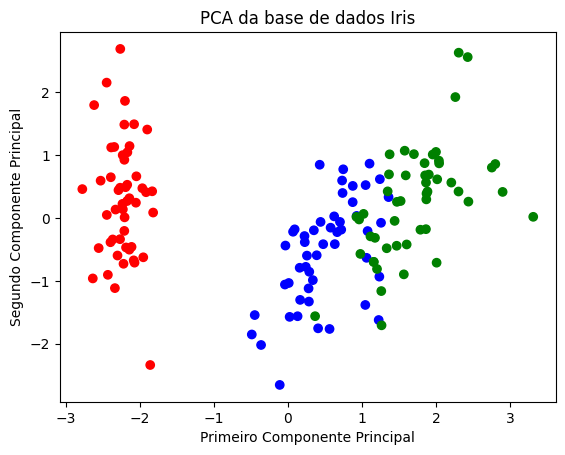

In [ ]:
fig, ax = plt.subplots()
colors = {'Iris-setosa':'red', 'Iris-versicolor':'blue', 'Iris-virginica':'green'}
ax.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['class'].apply(lambda x: colors[x]))
ax.set_xlabel('Primeiro Componente Principal')
ax.set_ylabel('Segundo Componente Principal')
ax.set_title('PCA da base de dados Iris')
plt.show()


# Após a plotagem do gráfico, observe se há uma separação linear entre dois grupos de objetos que pode contribuir para o melhor desempenho dos algoritmos de mineração de dados. Descreva sua análise.

### Resposta: Sim, podemos observar que existem dois grupos de objetos que parecem estar parcialmente separados linearmente. Esses grupos podem ser os grupos correspondentes a duas das três espécies de íris presentes na base de dados: Iris setosa e Iris versicolor.

### A separação linear dos grupos pode contribuir para o melhor desempenho dos algoritmos de mineração de dados, pois pode permitir a identificação mais precisa das espécies de íris com base em suas características medidas, como o comprimento e a largura das sépalas e pétalas. No entanto, é importante notar que a separação não é perfeita e há uma sobreposição considerável entre os grupos, o que pode dificultar a classificação precisa de algumas instâncias. Além disso, a separação pode não ser suficiente para distinguir adequadamente as três espécies de íris, que podem ter variações significativas dentro de cada grupo.

# Quetão 2

O conjunto de dados da Tabela abaixo, chamado Fidelização, trata de uma tentativa de obter dados das visitas dos clientes ao restaurante com o propósito de descobrir se existem fatores que contribuem para um cliente se fidelizar ao estabelecimento ou não. Os atributos descritivos de cada situação dizem respeito a diferentes tipos de avaliação realizadas em uma visita ao restaurante.


Logo abaixo está a resposta das letras A e C:

a- Realize uma análise exploratória dos dados de forma a verificar se
conclusões sobre fidelização podem ser tiradas a partir dessa análise. Em
sua análise, verifique as medidas de posição e separatrizes, medidas de
dispersão, projete gráficos do tipo histograma e boxplot e realize análise
de correlação.

c- Prepare um programa em qualquer linguagem de programação que
apresente as medidas e gráficos obtidos na análise exploratória e um
novo conjunto de dados (pré-processado) mais adequado para ser
minerado.



# Importação das bibliotecas 

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Lendo Data Base:

In [ ]:
url = '/content/Restaurante (1).csv'
dados = pd.read_csv(url)

# Data Base

In [ ]:
# exibe o dataframe
dados

,AVALIAÇÃO 1,AVALIAÇÃO 2,AVALIAÇÃO 3,Situação
0,9.69,22.91,2.36,Fidelizado
1,5.54,28.64,5.17,Fidelizado
2,NaN,22.91,NaN,Fidelizado
3,12.46,40.09,3.22,Fidelizado
4,11.07,17.18,1.55,Fidelizado
5,8.30,57.27,6.90,Fidelizado
6,2.77,34.36,12.41,Não fidelizado
7,5.54,17.18,6.01,Não fidelizado
8,NaN,11.45,NaN,Não fidelizado
9,8.30,NaN,NaN,Não fidelizado


Através de 12 amostras e 3 atributos de notas implícitas, podemos tentar ver a correlação com o atributo chave deste questionário “situação do cliente”. Um gerente de estabelecimento usará esse atributo para melhorar o serviço do restaurante.

## Substituição de "," por ".":

In [ ]:
# substituindo as vírgulas por pontos em todas as colunas
dados = dados.replace(",", ".", regex=True)

## Substituição de "??" por "NaN":

In [ ]:
# Substituindo os valores ausentes por NaN
dados = dados.replace("??", np.nan)

## Substituido o Tipo de alguns Atributos:

In [ ]:
# Convertendo as colunas de avaliação para valores float
dados[["AVALIAÇÃO 1", "AVALIAÇÃO 2", "AVALIAÇÃO 3"]] = dados[["AVALIAÇÃO 1", "AVALIAÇÃO 2", "AVALIAÇÃO 3"]].astype(float)

## Nomeando as Colunas:

In [ ]:
dados.rename(columns={"AVALIAÇÃO 1": "Nota 1", "AVALIAÇÃO 2": 'Nota 2', "AVALIAÇÃO 3": "Nota 3"}, inplace=True)

Quando percebi que o banco de dados tinha muitos pontos de falha, um deles era a nomenclatura das propriedades, renomeei-os como "notas". 1-3 pontos, respectivamente, tratam da avaliação do cliente.texto em itálico

## Filtrando o data base:

In [ ]:
dados = dados[dados["Nota 2"] < 23].reset_index(drop=True)
dados

,Nota 1,Nota 2,Nota 3,Situação
0,9.69,22.91,2.36,Fidelizado
1,NaN,22.91,NaN,Fidelizado
2,11.07,17.18,1.55,Fidelizado
3,5.54,17.18,6.01,Não fidelizado
4,NaN,11.45,NaN,Não fidelizado
5,6.92,5.73,4.88,Não fidelizado
6,13.84,11.45,0.83,Não fidelizado


Devido ao tamanho pequeno do dataset, foi possível observar visualmente uma diferença significativa nos valores do atributo "nota 2". Esse atributo apresentava uma amplitude de valores que ia de 5,73 a 57,27, sendo essa amplitude desproporcional em relação aos outros valores presentes na mesma coluna, que, com exceção do valor 57, não ultrapassavam o valor 23.

# Analíse Descritiva:

In [ ]:
#Verifica as informações básicas do conjunto de dados usando o método info() do pandas. Isso inclui o número de entradas, número de colunas, tipos de dados, etc.

dados.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Nota 1    5 non-null      float64
 1   Nota 2    7 non-null      float64
 2   Nota 3    5 non-null      float64
 3   Situação  7 non-null      object 
dtypes: float64(3), object(1)
memory usage: 352.0+ bytes


In [ ]:
#Verifica as medidas de posição e separatrizes e as medidas de dispersão usando o método describe() do pandas. Isso inclui a contagem, média, desvio padrão, mínimo, quartis e máximo para cada coluna.

dados.describe()

,Nota 1,Nota 2,Nota 3
count,5.000000,7.000000,5.000000
mean,9.412000,15.544286,3.126000
std,3.302873,6.373188,2.221268
min,5.540000,5.730000,0.830000
25%,6.920000,11.450000,1.550000
50%,9.690000,17.180000,2.360000
75%,11.070000,20.045000,4.880000
max,13.840000,22.910000,6.010000


In [ ]:
# selecionando apenas as colunas numéricas
numeric_cols = dados.select_dtypes(include=['float', 'int']).columns

# calculando as médias
means = dados[numeric_cols].mean()

# imprimindo as médias
print(means)

Nota 1     9.412000
Nota 2    15.544286
Nota 3     3.126000
dtype: float64


Ao analisarmos as médias, podemos observar que a "nota 2" apresentou um valor bastante elevado, enquanto a "nota 3" teve uma queda brusca. Com base nisso, podemos formular a hipótese de que durante o período de coleta da "nota 3", houve alguma mudança ou fator que influenciou diretamente esse resultado.

<Axes: >

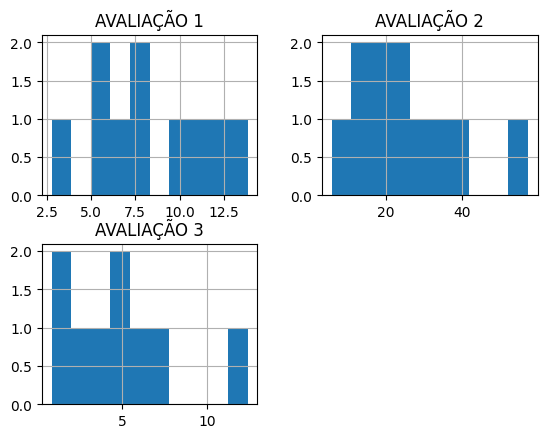

In [ ]:
#Projeta gráficos do tipo histograma e boxplot usando o método hist() e boxplot() do pandas.

dados.hist()
dados.boxplot()

In [ ]:
dados.describe(include="object")


,Situação
count,7
unique,2
top,Não fidelizado
freq,4


In [ ]:
#Realiza a análise de correlação usando o método corr() do pandas. Isso mostra a correlação entre cada par de colunas. 
dados.corr()

<ipython-input-5-6e5206cff6cc>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dados.corr()


,AVALIAÇÃO 1,AVALIAÇÃO 2,AVALIAÇÃO 3
AVALIAÇÃO 1,1.000000,-0.112387,-0.859475
AVALIAÇÃO 2,-0.112387,1.000000,0.422590
AVALIAÇÃO 3,-0.859475,0.422590,1.000000


# Limpando data base:

Ao utilizar a função isna() no dataset, identificamos a presença de valores faltantes que podem levar a erros de interpretação dos dados no futuro. Como o dataset possui apenas 7 amostras, optei por substituir os valores faltantes das notas pela média da respectiva coluna, a fim de evitar lacunas nos dados e não perder informações importantes fornecidas pelos clientes.

In [ ]:
# Esse código retorna a contagem de valores nulos em cada coluna do DataFrame dados, ordenando do menor para o maior número de valores nulos.
dados.isna().sum().sort_values(ascending=False)

Nota 1      2
Nota 3      2
Nota 2      0
Situação    0
dtype: int64

In [ ]:

dados['Situação'] = dados['Situação'].replace({'Fidelizado': 1, 'Não fidelizado': 0})


In [ ]:
# Analisando o Balance
Fiel, esporadico = dados["Situação"].value_counts()

## Clientes fidelizados e não fidelizados 

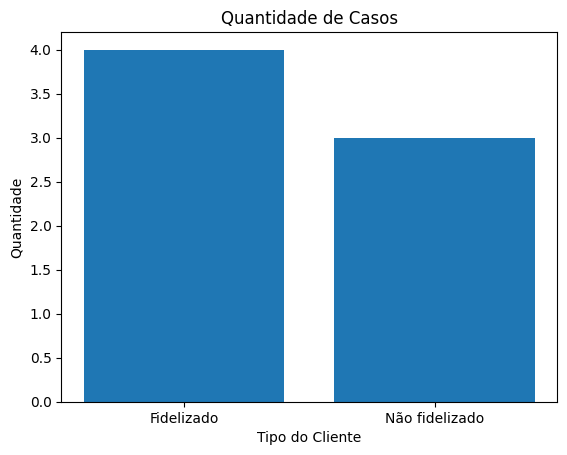

In [ ]:

# Mostrando graficamente a diferença entre tipos de um mesmo atributo:

# Dados de exemplo
valores = ['Fidelizado', 'Não fidelizado']
contagem = [Fiel, esporadico]

# Configuração do gráfico de barras
plt.bar(valores, contagem)
plt.title('Quantidade de Casos')
plt.xlabel('Tipo do Cliente')
plt.ylabel('Quantidade')

# Exibição do gráfico
plt.show()

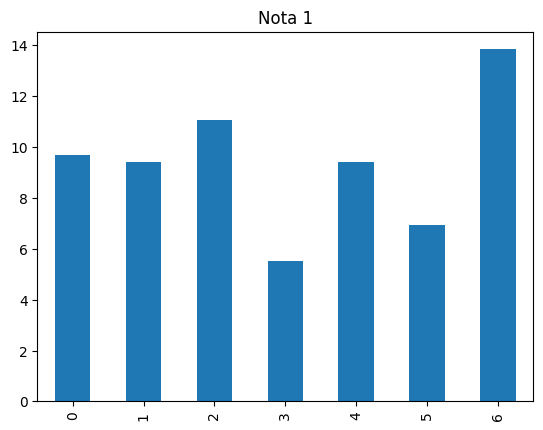

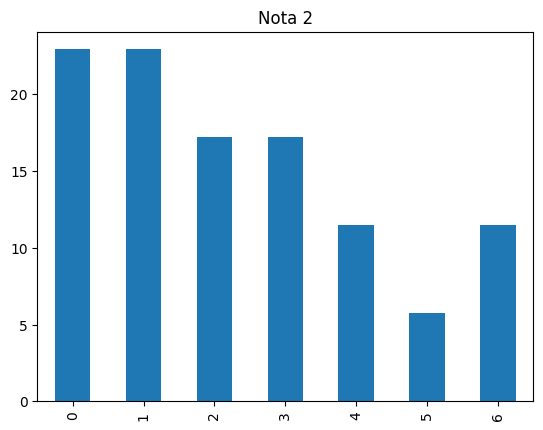

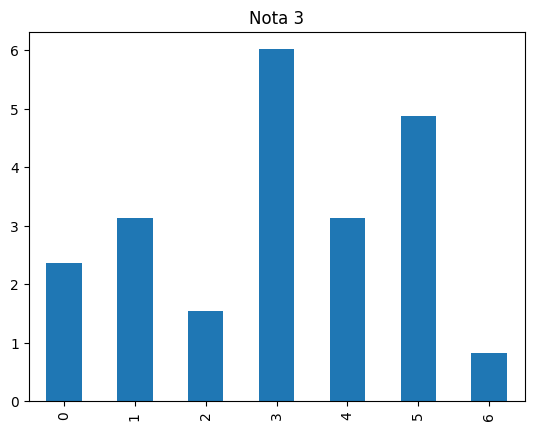

In [ ]:
# itera sobre as colunas do DataFrame
for coluna in df.columns[:3]:
  # gera o gráfico de barras
  plt.figure()
  df[coluna].plot(kind='bar')
  plt.title(coluna)
  plt.show()

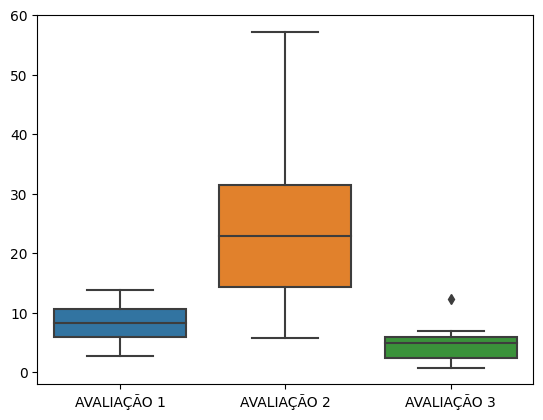

In [ ]:

# Boxplot
sns.boxplot(data=df)
plt.show()


<ipython-input-90-6ea214927f1d>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='coolwarm', annot=True)


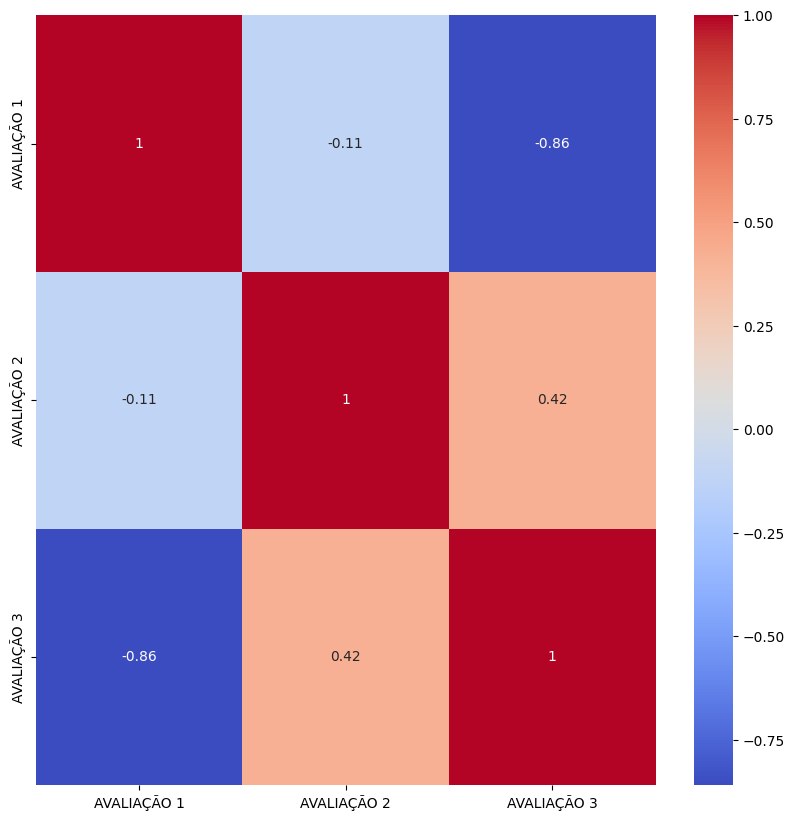

In [ ]:
# Definindo o tamanho da figura
plt.figure(figsize=(10, 10))

# Criando um mapa de calor da matriz de correlação
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

plt.show()

Podemos observar que os públicos que avaliaram bem a qualidade do serviço/alimento na nota 1 não são necessariamente os mesmos que deram notas altas na nota 3. Isso sugere que temos um grupo de pessoas heterogêneo com preferências distintas. Além disso, notamos que as avaliações na nota 3 não foram tão elevadas como nas notas 1 ou 2. Nesse sentido, é importante que o gerente evite situações semelhantes àquela ocorrida durante o teste 3, caso ele queira aumentar a popularidade do restaurante entre os clientes.



## PCA



In [ ]:
# Substituir os valores ausentes pela média de cada coluna
df = dados.fillna(dados.mean())

# Normalizar os dados
v = (df - df.mean()) / df.std()

# Criar o objeto PCA
pca = PCA()

# Aplicar o PCA nos dados normalizados
pca.fit(df_normal)

# Obter as componentes principais
componentes_principais = pca.components_

# Obter a variação explicada por cada componente principal
var_explicada = pca.explained_variance_ratio_

# Imprimir as componentes principais e a variação explicada por cada uma
for i, componente in enumerate(componentes_principais):
    print('Analise da coluna ' + df_normal.columns[i] + ':', var_explicada[i])
    print()

Analise da coluna Nota 1: 0.5823368376180075

Analise da coluna Nota 2: 0.37047616685002016

Analise da coluna Nota 3: 0.045239477268491285

Analise da coluna Situação: 0.0019475182634810843



Por fim, logo abaixo está a resposta da letra B

b- Supondo que tarefas de mineração de dados precisam ser resolvidas
sobre esse conjunto de dados, discorra sobre a necessidade de executar procedimentos de pré-processamento

Resposta: 

rocedimentos de pré-processamento são necessários na mineração de dados porque os dados brutos geralmente não estão prontos para serem analisados diretamente. Esses dados podem conter valores ausentes, inconsistências, variáveis irrelevantes ou em escalas diferentes, entre outros problemas.

O pré-processamento envolve uma série de procedimentos para limpar, transformar e preparar os dados para análise, a fim de melhorar a qualidade dos resultados. Por exemplo, ao lidar com valores ausentes, pode-se remover as linhas ou colunas inteiras ou preencher os valores faltantes com uma média ou mediana dos valores existentes. Ao lidar com variáveis em escalas diferentes, pode-se normalizar os dados para que todas as variáveis estejam na mesma escala e unidade.

Ao realizar procedimentos de pré-processamento, os dados se tornam mais precisos e adequados para serem analisados por algoritmos de mineração de dados. O pré-processamento também pode ajudar a reduzir o ruído e remover redundâncias nos dados, tornando-os mais fáceis de serem interpretados e utilizados para tomada de decisões.

Em resumo, o pré-processamento é uma etapa essencial na mineração de dados, que deve ser executada antes da análise para garantir a qualidade dos resultados. Ele ajuda a transformar dados brutos em dados úteis e significativos, tornando a mineração de dados mais eficaz e útil para empresas e organizações.